# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In C:\Users\s348a\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\s348a\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\s348a\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\s348a\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\s348a\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Data Exploration

In [4]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

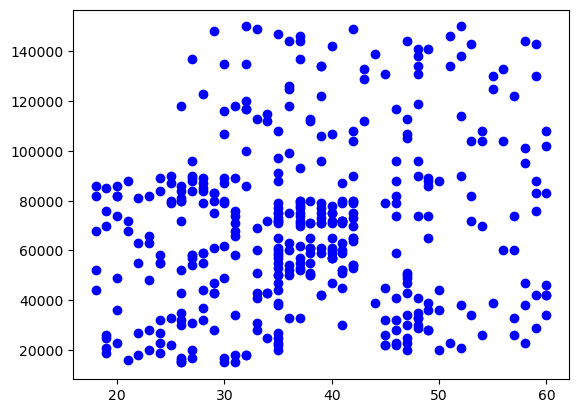

In [10]:
plt.scatter(dataset['Age'], dataset['EstimatedSalary'], c ="blue")
 
# To show the plot
plt.show()

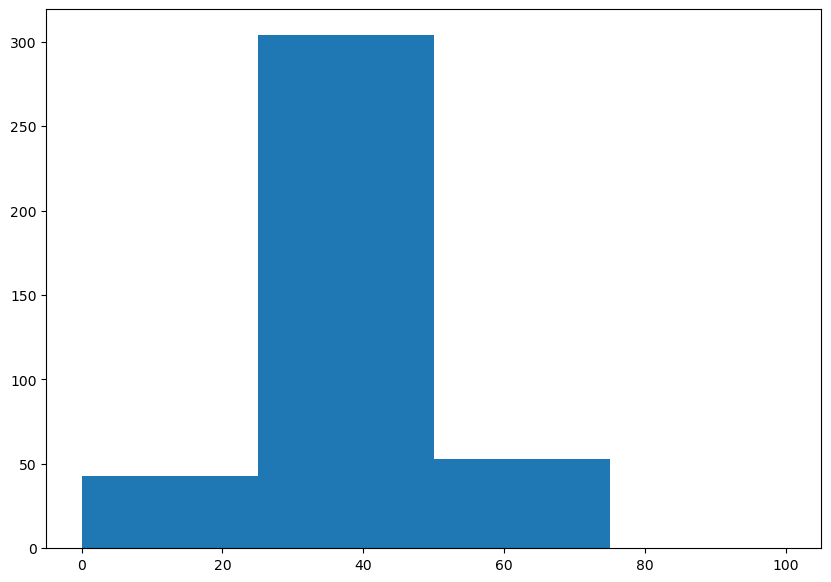

In [11]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dataset['Age'], bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

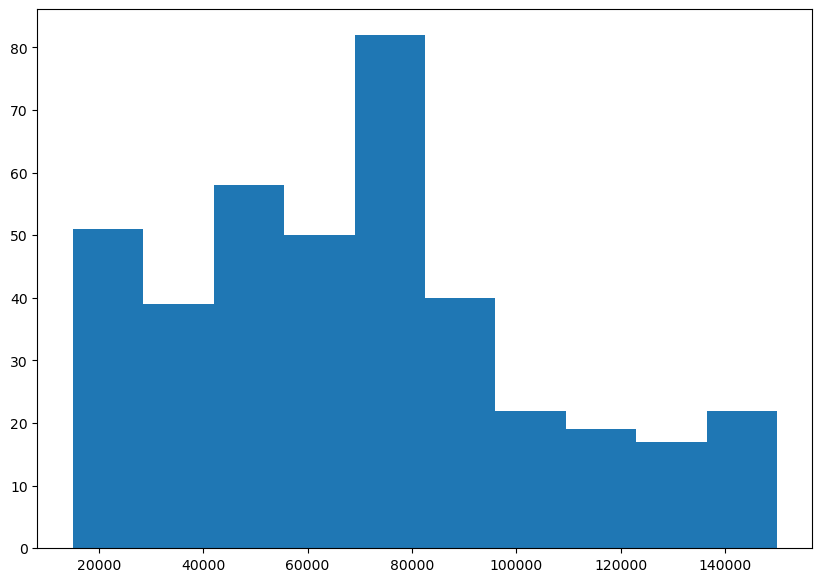

In [13]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dataset['EstimatedSalary'])
 
# Show plot
plt.show()

In [24]:
def label_function(val):
    return f'{val / 100 * len(dataset):.0f}\n{val:.0f}%'

<AxesSubplot:ylabel='None'>

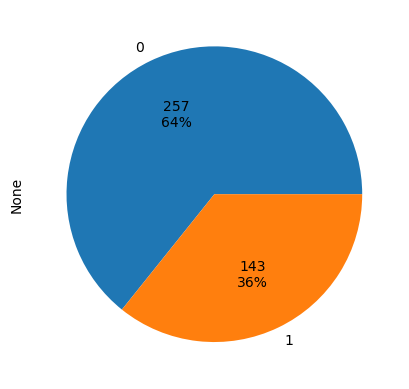

In [25]:
dataset.groupby('Purchased').size().plot(kind='pie', autopct=label_function)

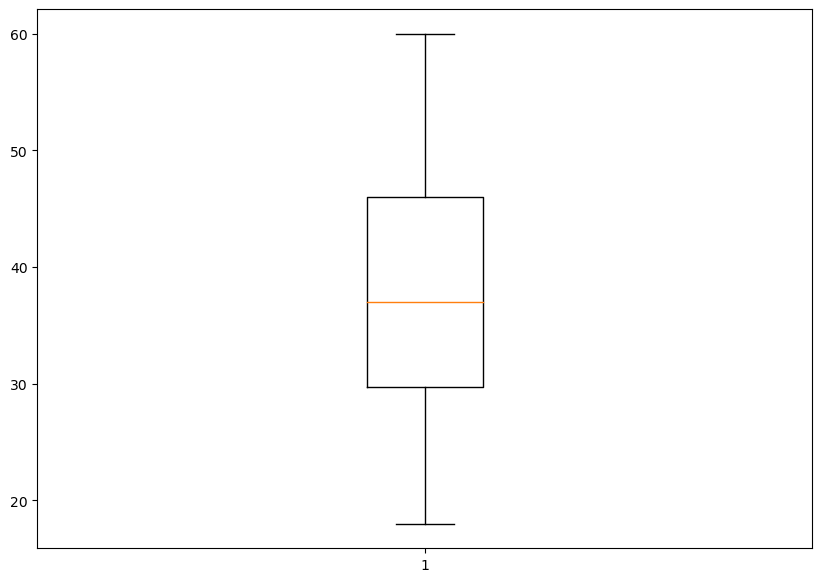

In [26]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(dataset['Age'])
 
# show plot
plt.show()

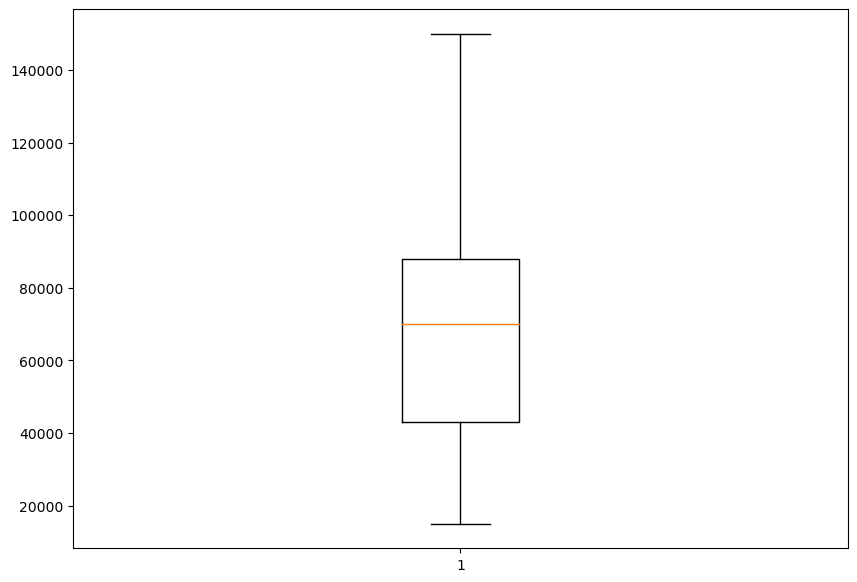

In [27]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(dataset['EstimatedSalary'])
 
# show dplot
plt.show()

In [28]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [30]:
X


array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## Splitting the dataset into the Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [35]:
print(X_train)

[[    32  18000]
 [    60  42000]
 [    19  76000]
 [    36  99000]
 [    19  26000]
 [    60  83000]
 [    24  89000]
 [    27  58000]
 [    40  47000]
 [    42  70000]
 [    32 150000]
 [    35  77000]
 [    22  63000]
 [    45  22000]
 [    27  89000]
 [    18  82000]
 [    42  79000]
 [    40  60000]
 [    53  34000]
 [    47 107000]
 [    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  8200

In [36]:
print(y_train)

[0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 0 0 0 0]


In [37]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [38]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0]


## Feature Scaling

In [ ]:
X_train

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
print(X_train)

[[-0.58252386 -1.5099209 ]
 [ 2.09652308 -0.81097862]
 [-1.82636709  0.17918961]
 [-0.19980287  0.8490093 ]
 [-1.82636709 -1.27694014]
 [ 2.09652308  0.38304778]
 [-1.34796585  0.55778335]
 [-1.0609251  -0.3450171 ]
 [ 0.18291812 -0.66536564]
 [ 0.37427862  0.00445404]
 [-0.58252386  2.33426165]
 [-0.29548312  0.20831221]
 [-1.53932634 -0.19940412]
 [ 0.66131936 -1.39343052]
 [-1.0609251   0.55778335]
 [-1.92204733  0.35392518]
 [ 0.37427862  0.2665574 ]
 [ 0.18291812 -0.28677191]
 [ 1.42676134 -1.04395938]
 [ 0.85267986  1.08199006]
 [ 1.90516258  2.15952608]
 [ 2.00084283  0.38304778]
 [-1.34796585 -0.43238488]
 [-1.15660535 -1.01483678]
 [ 1.90516258 -0.927469  ]
 [ 0.37427862  0.29567999]
 [ 0.18291812  0.15006702]
 [ 2.00084283  1.75180975]
 [ 0.75699961 -0.84010121]
 [ 0.27859837 -0.28677191]
 [ 0.37427862 -0.17028153]
 [-0.10412262  2.21777127]
 [-1.44364609 -0.63624305]
 [-1.2522856  -1.07308197]
 [-1.34796585  0.41217037]
 [-1.0609251   0.76164152]
 [-1.44364609 -0.19940412]
 

In [41]:
print(X_test)

[[-0.77388436  0.49953816]
 [-0.00844237 -0.57799786]
 [-0.29548312  0.15006702]
 [-0.77388436  0.2665574 ]
 [-0.29548312 -0.57799786]
 [-1.0609251  -1.45167571]
 [-0.67820411 -1.59728868]
 [-0.19980287  2.15952608]
 [-1.92204733 -0.05379115]
 [ 0.85267986 -0.78185602]
 [-0.77388436 -0.60712045]
 [-0.96524485 -0.43238488]
 [-0.10412262 -0.43238488]
 [ 0.08723787  0.20831221]
 [-1.73068684  0.47041556]
 [-0.58252386  1.37321601]
 [-0.10412262  0.20831221]
 [-1.82636709  0.44129297]
 [ 1.61812184  1.75180975]
 [-0.29548312 -1.39343052]
 [-0.29548312 -0.66536564]
 [ 0.85267986  2.15952608]
 [ 0.27859837 -0.54887526]
 [ 0.85267986  1.02374487]
 [-1.44364609 -1.21869495]
 [ 1.04404035  2.07215829]
 [-0.96524485  0.49953816]
 [-0.86956461  0.29567999]
 [-0.10412262 -0.22852672]
 [-0.58252386  0.47041556]
 [-1.63500659  0.52866075]
 [-0.10412262  0.2665574 ]
 [ 1.80948234 -0.28677191]
 [-0.10412262 -0.49063007]
 [-1.34796585 -0.3450171 ]
 [-1.92204733 -0.51975267]
 [-1.53932634  0.32480259]
 

## Training the Logistic Regression model on the Training set

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
help(LogisticRegression)

## Predicting a new result

In [46]:
print(classifier.predict(sc.transform([[33,18000]])))

[0]


## Predicting the Test set results

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()